## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.8: plot a schematic IMF

#### prescription from Chabrier 2003 Table 1 (https://ui.adsabs.harvard.edu/abs/2003PASP..115..763C/abstract)
#### this is different - and more accurate - than the heuristic version in the book

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline

In [6]:
A1 = 0.158
mc = 0.079
sigma = 0.69
A2 = 0.0443
x = 1.3

In [7]:
npts = 100
m = np.logspace(-2.5,2.5,npts)
xi = np.zeros(npts)
i1 = m < 1
xi[i1] = A1*np.exp(-(np.log10(m[i1])-np.log10(mc))**2/(2*sigma**2))
xi[~i1] = A2*m[~i1]**(-x)
xi /= xi.max()

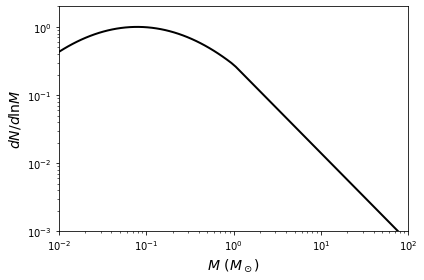

In [8]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.set_xlim(0.01, 100)
ax.set_ylim(1e-3, 2)
ax.set_xlabel(r'$M\ (M_\odot)$', fontsize=14)
ax.set_ylabel(r'$dN/d{\rm ln}M$', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(m, xi, color='black', lw=2, ls='-')

fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
plt.savefig('imf.pdf')